#Feedforward

##ANN

ANN with BatchNormalization

In [ ]:
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Build the MLP model with Batch Normalization
input_shape = data_train_resampled.shape[1]
num_classes = len(np.unique(target_train))

ann_classifier1 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=(input_shape,)),
    tf.keras.layers.BatchNormalization(),  # Add Batch Normalization here
    tf.keras.layers.Activation('relu'),     # Add Activation layer separately
    tf.keras.layers.Dense(20),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

ann_classifier1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model to the training data and save the history
history_ann1= ann_classifier1.fit(data_train_resampled, target_train_resampled, epochs=25, validation_data=(data_valid ,target_valid))

#10 epochs 5s 124ms/step - loss: 0.2732 - accuracy: 0.8728 - val_loss: 0.2310 - val_accuracy: 0.9617
#25 epochs  loss: 0.1779 - accuracy: 0.9125 - val_loss: 0.1211 - val_accuracy: 0.9754

Epoch 1/25
152/152 [==============================] - 11s 59ms/step - loss: 0.8037 - accuracy: 0.7539 - val_loss: 1.4462 - val_accuracy: 0.2601
Epoch 2/25
152/152 [==============================] - 11s 70ms/step - loss: 0.4157 - accuracy: 0.8674 - val_loss: 0.4792 - val_accuracy: 0.9516
Epoch 3/25
152/152 [==============================] - 9s 57ms/step - loss: 0.3287 - accuracy: 0.8817 - val_loss: 0.1760 - val_accuracy: 0.9543
Epoch 4/25
152/152 [==============================] - 11s 71ms/step - loss: 0.2972 - accuracy: 0.8856 - val_loss: 0.1519 - val_accuracy: 0.9559
Epoch 5/25
152/152 [==============================] - 9s 58ms/step - loss: 0.2788 - accuracy: 0.8898 - val_loss: 0.1376 - val_accuracy: 0.9566
Epoch 6/25
152/152 [==============================] - 11s 70ms/step - loss: 0.2596 - accuracy: 0.8958 - val_loss: 0.1356 - val_accuracy: 0.9567
Epoch 7/25
152/152 [==============================] - 8s 50ms/step - loss: 0.2497 - accuracy: 0.8956 - val_loss: 0.1298 - val_accuracy: 0.

In [ ]:
#Predict the values using the ANN model
y_pred_probabilities1 = ann_classifier1.predict(data_test)
y_pred_ann1= tf.argmax(y_pred_probabilities1, axis=1)

2342/2342 [==============================] - 3s 1ms/step


In [ ]:
#Predict the values using the ANN model
y_pred_probabilities1 = ann_classifier1.predict(data_test)
y_pred_ann1= tf.argmax(y_pred_probabilities1, axis=1)

2342/2342 [==============================] - 3s 1ms/step


In [ ]:
#calculating the testing accuracy for the ANN model
accuracy1 = accuracy_score(target_test, y_pred_ann1)
print(f'ANN Accuracy: {accuracy1 * 100:.2f}%')
print("Classification Report for ANN\n", classification_report(target_test,y_pred_ann1))
#10 epochs ANN Accuracy: 93.18%
#25 epochs 94.30%

ANN Accuracy: 94.17%
Classification Report for ANN
               precision    recall  f1-score   support

           0       0.35      0.27      0.30      2617
           1       1.00      0.92      0.96       462
           2       0.45      0.62      0.52      3290
           3       1.00      0.98      0.99     66938
           4       0.76      0.92      0.83      1626

    accuracy                           0.94     74933
   macro avg       0.71      0.74      0.72     74933
weighted avg       0.95      0.94      0.94     74933



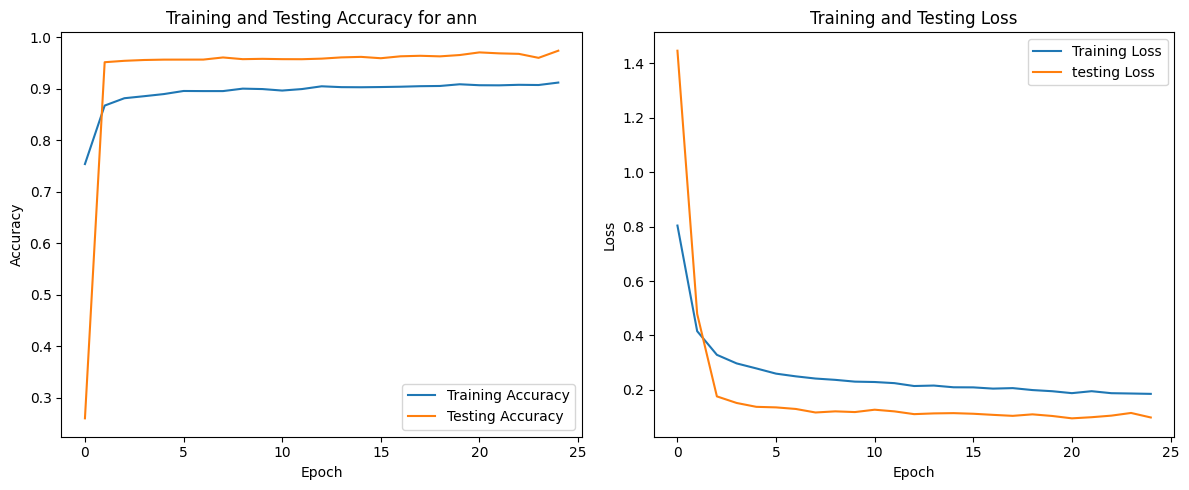

In [ ]:
plt.figure(figsize=(12, 5))

# Plot Training Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_ann1.history['accuracy'], label='Training Accuracy')
plt.plot(history_ann1.history['val_accuracy'], label='Testing Accuracy')
plt.title('Training and Testing Accuracy for ann')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training Loss
plt.subplot(1, 2, 2)
plt.plot(history_ann1.history['loss'], label='Training Loss')
plt.plot(history_ann1.history['val_loss'], label='testing Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#the gap was gone the first time we run the code after adjusting the training set percent ,
# but we forgot to save the initial weights and the gap get back the next time we run it

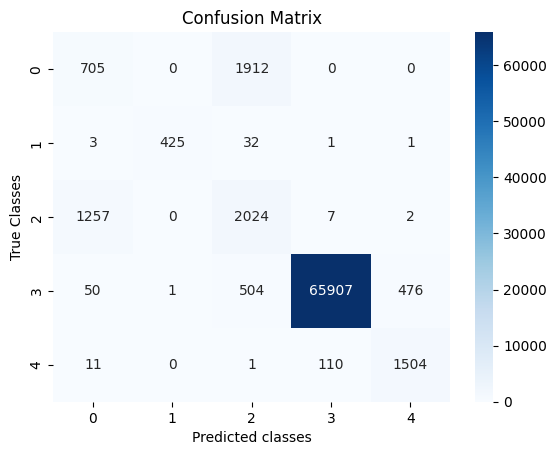

In [ ]:
# Plotting confusion matrix
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(target_test, y_pred_ann1), annot=True, cmap="Blues",fmt="d")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

ANN with BatchNormalization and Dropout

In [ ]:
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.models import Sequential

# Build the ann model with Batch Normalization and Dropout
input_shape = data_train_resampled.shape[1]
num_classes = len(np.unique(target_train_resampled))

ann_classifier = Sequential([
    Dense(50, input_shape=(input_shape,)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    Dense(20),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

ann_classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model to the training data and save the history
history_ann2 = ann_classifier.fit(data_train_resampled, target_train_resampled, epochs=25, validation_data=(data_valid, target_valid))
#10 epochs - 21s 490ms/step - loss: 0.5397 - accuracy: 0.7588 - val_loss: 0.1775 - val_accuracy: 0.9595
# 25 epochs 152/152 [==============================] - 11s 72ms/step - loss: 0.3444 - accuracy: 0.8534 - val_loss: 0.1911 - val_accuracy: 0.9632

Epoch 1/25
152/152 [==============================] - 10s 54ms/step - loss: 1.4862 - accuracy: 0.3926 - val_loss: 0.9233 - val_accuracy: 0.8118
Epoch 2/25
152/152 [==============================] - 11s 70ms/step - loss: 1.0038 - accuracy: 0.6172 - val_loss: 0.4044 - val_accuracy: 0.9436
Epoch 3/25
152/152 [==============================] - 11s 70ms/step - loss: 0.8546 - accuracy: 0.6759 - val_loss: 0.2030 - val_accuracy: 0.9477
Epoch 4/25
152/152 [==============================] - 11s 70ms/step - loss: 0.7470 - accuracy: 0.7220 - val_loss: 0.1634 - val_accuracy: 0.9489
Epoch 5/25
152/152 [==============================] - 11s 70ms/step - loss: 0.6662 - accuracy: 0.7440 - val_loss: 0.1576 - val_accuracy: 0.9509
Epoch 6/25
152/152 [==============================] - 8s 53ms/step - loss: 0.6177 - accuracy: 0.7570 - val_loss: 0.1585 - val_accuracy: 0.9505
Epoch 7/25
152/152 [==============================] - 11s 70ms/step - loss: 0.5876 - accuracy: 0.7686 - val_loss: 0.1590 - val_accuracy: 

In [ ]:
#Predict the values using the ANN model
y_pred_probabilities2 = ann_classifier.predict(data_test)
y_pred_ann2= tf.argmax(y_pred_probabilities2, axis=1)

2342/2342 [==============================] - 3s 1ms/step


In [ ]:
#calculating the testing accuracy for the ANN model
accuracy2 = accuracy_score(target_test, y_pred_ann2)
print(f'ANN Accuracy: {accuracy2 * 100:.2f}%')
print("Classification Report for ANN\n", classification_report(target_test,y_pred_ann2))
#10 epochs ANN Accuracy: 92.64%
#25 epochs ANN Accuracy: 92.26%

ANN Accuracy: 92.13%
Classification Report for ANN
               precision    recall  f1-score   support

           0       0.82      0.13      0.22      2617
           1       1.00      0.91      0.95       462
           2       0.37      0.60      0.46      3290
           3       1.00      0.97      0.98     66938
           4       0.39      0.93      0.55      1626

    accuracy                           0.92     74933
   macro avg       0.72      0.71      0.63     74933
weighted avg       0.95      0.92      0.92     74933



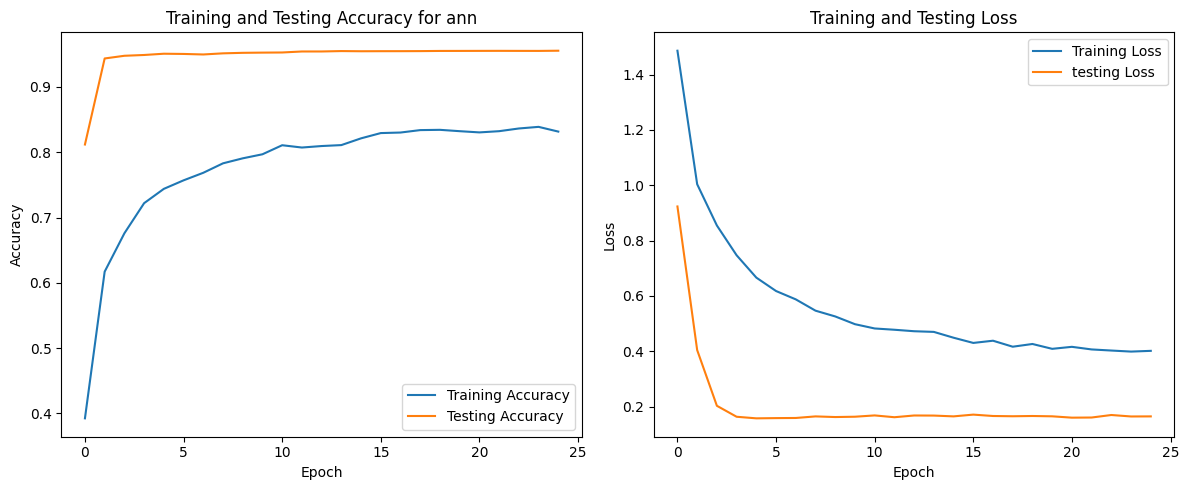

In [ ]:
plt.figure(figsize=(12, 5))

# Plot Training Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_ann2.history['accuracy'], label='Training Accuracy')
plt.plot(history_ann2.history['val_accuracy'], label='Testing Accuracy')
plt.title('Training and Testing Accuracy for ann')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training Loss
plt.subplot(1, 2, 2)
plt.plot(history_ann2.history['loss'], label='Training Loss')
plt.plot(history_ann2.history['val_loss'], label='testing Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

ANN with Dropout

In [ ]:
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.models import Sequential

# Build the ANN model with Batch Normalization and Dropout
input_shape = data_train_resampled.shape[1]
num_classes = len(np.unique(target_train_resampled))

ann_classifier = Sequential([
    Dense(64, input_shape=(input_shape,)),
    Activation('relu'),
    Dropout(0.5),  # Add Dropout layer with a dropout rate (e.g., 0.5)
    Dense(32),
    Activation('relu'),
    Dropout(0.5),  # Add Dropout layer with a dropout rate (e.g., 0.5)
    Dense(num_classes, activation='softmax')
])

ann_classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model to the training data and save the history
history_ann3 = ann_classifier.fit(data_train_resampled, target_train_resampled, epochs=25, validation_data=(data_valid, target_valid))
#10 epochs 43/43 [==============================] - 10s 246ms/step - loss: 0.5399 - accuracy: 0.7537 - val_loss: 0.2171 - val_accuracy: 0.9612  + data spliting 70 30
#25 epochs - loss: 0.2747 - accuracy: 0.8802 - val_loss: 0.2239 - val_accuracy: 0.9637 +  data spliting 80 20

Epoch 1/25
152/152 [==============================] - 11s 71ms/step - loss: 1.3878 - accuracy: 0.4215 - val_loss: 0.5822 - val_accuracy: 0.9227
Epoch 2/25
152/152 [==============================] - 9s 63ms/step - loss: 0.8851 - accuracy: 0.6858 - val_loss: 0.2155 - val_accuracy: 0.9453
Epoch 3/25
152/152 [==============================] - 7s 47ms/step - loss: 0.6264 - accuracy: 0.7665 - val_loss: 0.1837 - val_accuracy: 0.9464
Epoch 4/25
152/152 [==============================] - 11s 70ms/step - loss: 0.5161 - accuracy: 0.8060 - val_loss: 0.1781 - val_accuracy: 0.9479
Epoch 5/25
152/152 [==============================] - 8s 55ms/step - loss: 0.4565 - accuracy: 0.8252 - val_loss: 0.1790 - val_accuracy: 0.9486
Epoch 6/25
152/152 [==============================] - 7s 47ms/step - loss: 0.4253 - accuracy: 0.8294 - val_loss: 0.1791 - val_accuracy: 0.9493
Epoch 7/25
152/152 [==============================] - 10s 69ms/step - loss: 0.4034 - accuracy: 0.8333 - val_loss: 0.1714 - val_accuracy: 0.9

In [ ]:
#Predict the values using the ANN model
y_pred_probabilities3 = ann_classifier.predict(data_test)
y_pred_ann3= tf.argmax(y_pred_probabilities3, axis=1)

2342/2342 [==============================] - 3s 1ms/step


In [ ]:
#calculating the testing accuracy for the ANN model
accuracy3= accuracy_score(target_test, y_pred_ann3)
print(f'ANN Accuracy: {accuracy3 * 100:.2f}%')
print("Classification Report for ANN\n", classification_report(target_test,y_pred_ann3))
#10 epochs ANN Accuracy: 92.53%
#25 epochs 92.40%

ANN Accuracy: 92.34%
Classification Report for ANN
               precision    recall  f1-score   support

           0       0.26      0.17      0.20      2617
           1       1.00      0.93      0.96       462
           2       0.34      0.62      0.43      3290
           3       1.00      0.97      0.98     66938
           4       0.82      0.92      0.87      1626

    accuracy                           0.92     74933
   macro avg       0.68      0.72      0.69     74933
weighted avg       0.94      0.92      0.93     74933



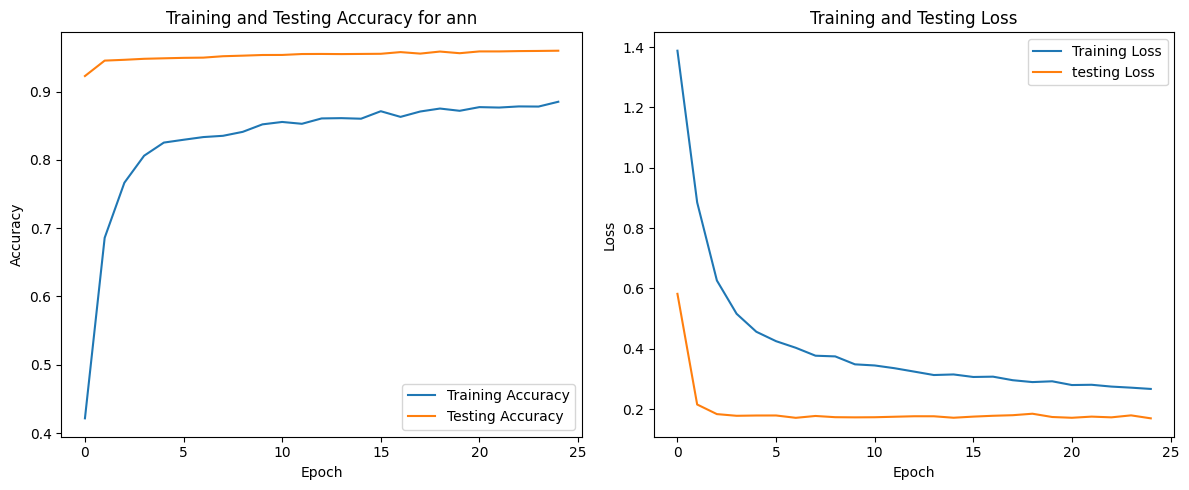

In [ ]:
plt.figure(figsize=(12, 5))

# Plot Training Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_ann3.history['accuracy'], label='Training Accuracy')
plt.plot(history_ann3.history['val_accuracy'], label='Testing Accuracy')
plt.title('Training and Testing Accuracy for ann')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training Loss
plt.subplot(1, 2, 2)
plt.plot(history_ann3.history['loss'], label='Training Loss')
plt.plot(history_ann3.history['val_loss'], label='testing Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Normal ANN

In [ ]:
seed_value = 42

# Set seed for Numpy(so the initial random weights won't change)
np.random.seed(seed_value)

# Set seed for TensorFlow
tf.random.set_seed(seed_value)

#Build the ANN model and fit the data to it
input_shape = data_train_resampled.shape[1]
num_classes = 5
ann_classifier0= tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

ann_classifier0.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_ann0= ann_classifier0.fit(data_train_resampled, target_train_resampled, epochs=25, validation_data=(data_valid, target_valid))
#10 epochs s 129ms/step - loss: 0.3067 - accuracy: 0.8640 - val_loss: 0.2315 - val_accuracy: 0.9596
#25 epochs oss: 0.1789 - accuracy: 0.9138 - val_loss: 0.1515 - val_accuracy: 0.9642

Epoch 1/25
152/152 [==============================] - 9s 55ms/step - loss: 1.1027 - accuracy: 0.6480 - val_loss: 0.2668 - val_accuracy: 0.9372
Epoch 2/25
152/152 [==============================] - 11s 70ms/step - loss: 0.5287 - accuracy: 0.8374 - val_loss: 0.1744 - val_accuracy: 0.9467
Epoch 3/25
152/152 [==============================] - 11s 70ms/step - loss: 0.3678 - accuracy: 0.8614 - val_loss: 0.1594 - val_accuracy: 0.9526
Epoch 4/25
152/152 [==============================] - 8s 55ms/step - loss: 0.3060 - accuracy: 0.8805 - val_loss: 0.1626 - val_accuracy: 0.9547
Epoch 5/25
152/152 [==============================] - 7s 48ms/step - loss: 0.2797 - accuracy: 0.8852 - val_loss: 0.1439 - val_accuracy: 0.9552
Epoch 6/25
152/152 [==============================] - 11s 70ms/step - loss: 0.2665 - accuracy: 0.8848 - val_loss: 0.1502 - val_accuracy: 0.9555
Epoch 7/25
152/152 [==============================] - 10s 69ms/step - loss: 0.2571 - accuracy: 0.8891 - val_loss: 0.1385 - val_accuracy: 0.

In [ ]:
#Predict the values using the ANN model
y_pred_probabilities0 = ann_classifier0.predict(data_test)
y_pred_ann0= tf.argmax(y_pred_probabilities0, axis=1)

2342/2342 [==============================] - 4s 2ms/step


In [ ]:
#calculating the testing accuracy for the ANN model
accuracy0= accuracy_score(target_test, y_pred_ann0)
print(f'ANN Accuracy: {accuracy0 * 100:.2f}%')
print("Classification Report for ANN\n", classification_report(target_test,y_pred_ann0))
#10 epochs 92.73%
#25 epochs  92.64%

ANN Accuracy: 92.75%
Classification Report for ANN
               precision    recall  f1-score   support

           0       0.30      0.20      0.24      2617
           1       1.00      0.81      0.89       462
           2       0.35      0.61      0.44      3290
           3       1.00      0.97      0.99     66938
           4       0.82      0.93      0.87      1626

    accuracy                           0.93     74933
   macro avg       0.69      0.70      0.69     74933
weighted avg       0.94      0.93      0.93     74933



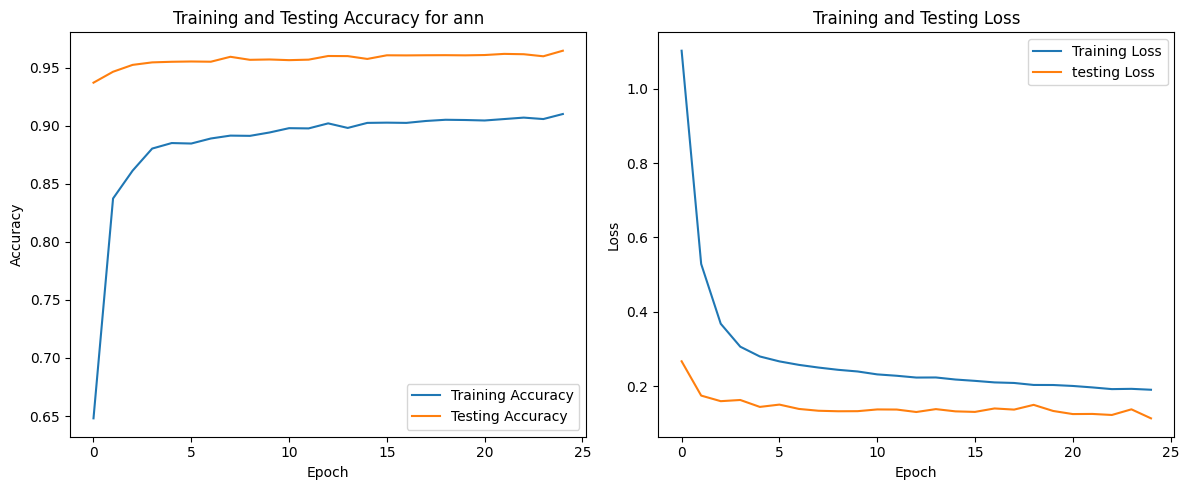

In [ ]:
plt.figure(figsize=(12, 5))

# Plot Training Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_ann0.history['accuracy'], label='Training Accuracy')
plt.plot(history_ann0.history['val_accuracy'], label='Testing Accuracy')
plt.title('Training and Testing Accuracy for ann')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training Loss
plt.subplot(1, 2, 2)
plt.plot(history_ann0.history['loss'], label='Training Loss')
plt.plot(history_ann0.history['val_loss'], label='testing Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

##MLP

In [ ]:
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Build the MLP model
mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    max_iter=1000,
    batch_size=64,
    tol=1e-4,       # convergence criteria
    random_state=42
)

# Fit the model to the training data
history_mlp = mlp_classifier.fit(data_train_resampled, target_train_resampled)

# Predict the values using the MLP model
y_pred_mlp = mlp_classifier.predict(data_test)


In [ ]:
#calculating the testing accuracy for the MLP model
accuracy_mlp= accuracy_score(target_test, y_pred_mlp)
print(f'MLP Accuracy: {accuracy_mlp * 100:.2f}%')
print("Classification Report for MLP\n", classification_report(target_test,y_pred_mlp ))

MLP Accuracy: 98.26%
Classification Report for MLP
               precision    recall  f1-score   support

           0       0.76      1.00      0.86      2617
           1       1.00      0.80      0.89       462
           2       0.93      0.75      0.83      3290
           3       1.00      1.00      1.00     66938
           4       0.95      0.93      0.94      1626

    accuracy                           0.98     74933
   macro avg       0.93      0.89      0.90     74933
weighted avg       0.98      0.98      0.98     74933



In [ ]:
train_accuracy = mlp_classifier.score(data_train_resampled, target_train_resampled)
test_accuracy = mlp_classifier.score(data_test, target_test)
ta=mlp_classifier.score(data_test, target_test)
print(f'Training Accuracy: {train_accuracy* 100:.2f}%')
print(f'Test Accuracy: {test_accuracy* 100:.2f}%')

Training Accuracy: 98.76%
Test Accuracy: 98.26%


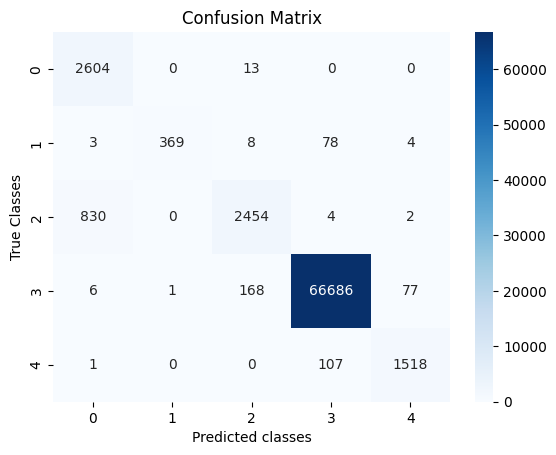

In [ ]:
# Plotting confusion matrix
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(target_test, y_pred_mlp), annot=True, cmap="Blues",fmt="d")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

#KNN

In [ ]:
#Build the KNN model and fit the data to it
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(data_train_resampled, target_train_resampled)
#Predict the values using the KNN model
target_pred_knn = knn_classifier.predict(data_test)

In [ ]:
#calculating the testing accuracy for the KNN model
accuracy_knn = accuracy_score(target_test, target_pred_knn)
print(f'Testing Accuracy: {accuracy_knn* 100:.2f}%')
print("Classification Report for KNN\n", classification_report(target_test,target_pred_knn ))

Testing Accuracy: 97.20%
Classification Report for KNN
               precision    recall  f1-score   support

           0       0.74      0.97      0.84      2617
           1       0.79      0.80      0.80       462
           2       0.87      0.73      0.79      3290
           3       1.00      0.99      0.99     66938
           4       0.72      0.92      0.81      1626

    accuracy                           0.97     74933
   macro avg       0.82      0.88      0.84     74933
weighted avg       0.98      0.97      0.97     74933



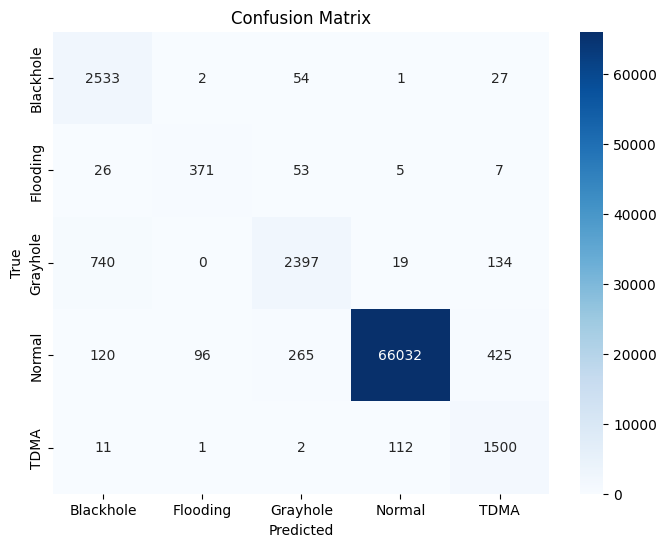

In [ ]:
class_names = ['Blackhole', 'Flooding', 'Grayhole', 'Normal', 'TDMA']


cm = confusion_matrix(target_test, target_pred_knn)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
#checking if there is overfitting
train_accuracy_knn = knn_classifier.score(data_train_resampled, target_train_resampled)
test_accuracy_knn = knn_classifier.score(data_test, target_test)
ta=mlp_classifier.score(data_test, target_test)
print(f'Training Accuracy: {train_accuracy_knn* 100:.2f}%')
print(f'Test Accuracy: {test_accuracy_knn* 100:.2f}%')

Training Accuracy: 98.72%
Test Accuracy: 97.20%


#Decision Tree

In [ ]:
#Build the DT model and fit the data to it
dt_classifier = DecisionTreeClassifier(max_depth=5, criterion='entropy',random_state=123)
dt_classifier.fit(data_train_resampled,np.ravel(target_train_resampled))
#Predict the values using the DT model
target_pred_dt = dt_classifier.predict(data_test)

In [ ]:
#calculating the testing accuracy for the DT model
print("Classification Report for DT\n", classification_report(target_test,target_pred_dt ))
print('DT accuracy:' , round(accuracy_score(target_test,target_pred_dt)*100, 2), '%')

Classification Report for DT
               precision    recall  f1-score   support

           0       0.95      0.88      0.92      2617
           1       1.00      0.90      0.95       462
           2       0.55      0.97      0.70      3290
           3       1.00      0.97      0.98     66938
           4       1.00      0.85      0.92      1626

    accuracy                           0.96     74933
   macro avg       0.90      0.91      0.89     74933
weighted avg       0.98      0.96      0.97     74933

DT accuracy: 96.2 %


Test accuracy for Decision tree Classifier: 96.2 %


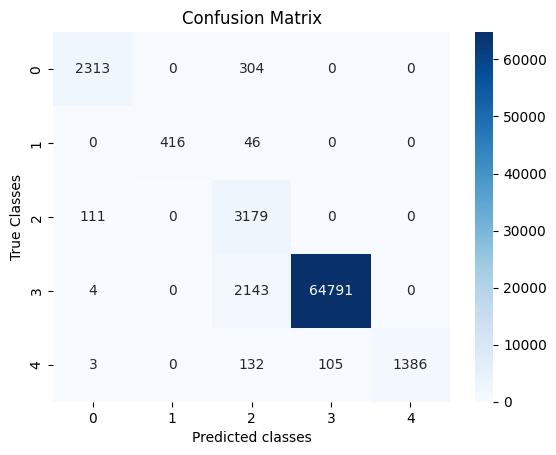

In [ ]:
# Plotting confusion matrix
print('Test accuracy for Decision tree Classifier:'\
      , round(accuracy_score(target_test,target_pred_dt)*100, 2), '%')
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(target_test,target_pred_dt), annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted classes')
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

#Random Forest Classifier

In [ ]:
#Build the RF model and fit the data to it
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(data_train_resampled, target_train_resampled)
#Predict the values using the RF model
target_pred_rf = rf_classifier.predict(data_test)

In [ ]:
#calculating the testing accuracy for the RF model
accuracy_RF = accuracy_score(target_test, target_pred_rf)
print(f'Test Accuracy: {accuracy_RF* 100:.2f}%')
print("Classification Report for RF\n", classification_report(target_test,target_pred_rf ))

Test Accuracy: 98.78%
Classification Report for RF
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      2617
           1       1.00      0.90      0.95       462
           2       0.85      0.95      0.90      3290
           3       1.00      0.99      0.99     66938
           4       0.95      0.93      0.94      1626

    accuracy                           0.99     74933
   macro avg       0.95      0.95      0.95     74933
weighted avg       0.99      0.99      0.99     74933



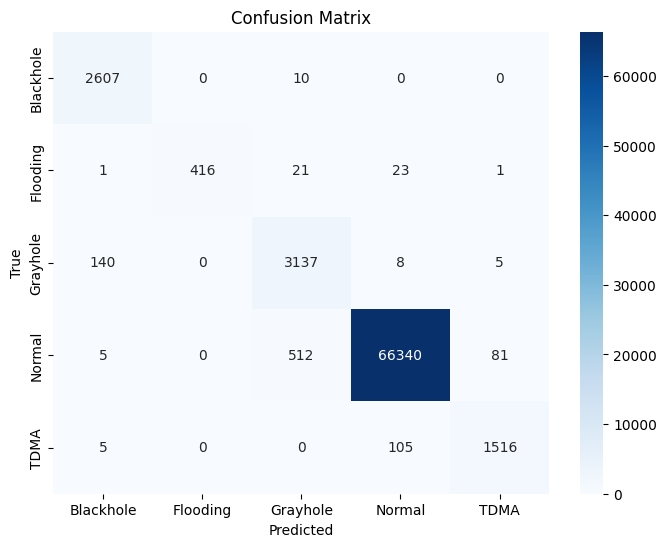

In [ ]:
class_names = ['Blackhole', 'Flooding', 'Grayhole', 'Normal', 'TDMA']


cm = confusion_matrix(target_test, target_pred_rf)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
#checking if there is overfitting
train_accuracy_rf = rf_classifier.score(data_train_resampled, target_train_resampled)
test_accuracy_rf =rf_classifier.score(data_test, target_test)
print(f'Train Accuracy: {train_accuracy_rf* 100:.2f}%')
print(f'Test Accuracy: {test_accuracy_rf* 100:.2f}%')

Train Accuracy: 99.96%
Test Accuracy: 98.78%


#XGBoost Classifier

In [ ]:
#Build the XGB model and fit the data to it
xgb_classifier = XGBClassifier()
xgb_classifier.fit(data_train_resampled, target_train_resampled)
#Predict the values using the XGB model
target_pred_xgb = xgb_classifier.predict(data_test)

In [ ]:
#calculating the testing accuracy for the XGB model
accuracy_xgb = accuracy_score(target_test, target_pred_xgb)
print(f'Test Accuracy: {accuracy_xgb* 100:.2f}%')
print("Classification Report for xgb\n", classification_report(target_test,target_pred_xgb ))

Test Accuracy: 98.63%
Classification Report for xgb
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      2617
           1       1.00      0.56      0.71       462
           2       0.88      0.94      0.91      3290
           3       1.00      0.99      0.99     66938
           4       0.91      0.93      0.92      1626

    accuracy                           0.99     74933
   macro avg       0.94      0.88      0.90     74933
weighted avg       0.99      0.99      0.99     74933



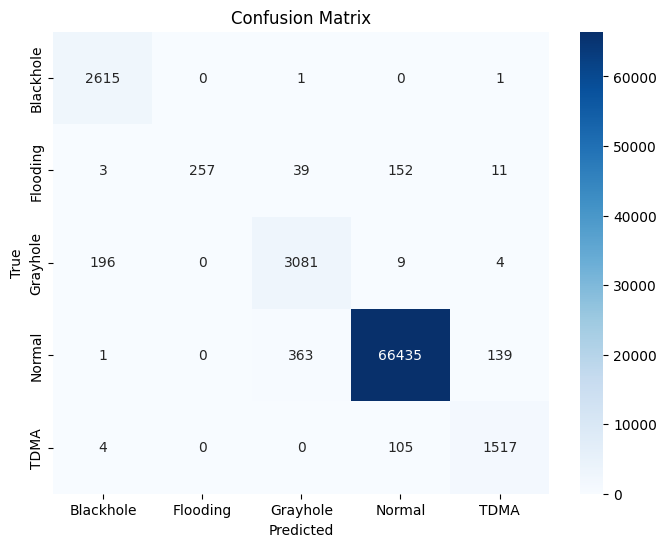

In [ ]:
# Plotting confusion matrix
class_names = ['Blackhole', 'Flooding', 'Grayhole', 'Normal', 'TDMA']
cm = confusion_matrix(target_test, target_pred_xgb)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
#checking if there is overfitting
train_accuracy_xgb = xgb_classifier.score(data_train_resampled, target_train_resampled)
test_accuracy_xgb = xgb_classifier.score(data_test, target_test)
print(f'Train Accuracy: {train_accuracy_xgb* 100:.2f}%')
print(f'Test Accuracy: {test_accuracy_xgb* 100:.2f}%')

Train Accuracy: 99.90%
Test Accuracy: 98.63%


#Gaussian Naive Bayes Classifier

In [ ]:
#Build the NB model and fit the data to it
nb_classifier = GaussianNB()
nb_classifier.fit(data_train_resampled, target_train_resampled)
#Predict the values using the NB model
target_pred_nb = nb_classifier.predict(data_test)

In [ ]:
#calculating the testing accuracy for the NB model
accuracy_nb = accuracy_score(target_test, target_pred_nb)
print(f'Test Accuracy: {accuracy_nb* 100:.2f}%')
print("Classification Report for Naive Bayes\n", classification_report(target_test,target_pred_nb ))

Test Accuracy: 94.14%
Classification Report for Naive Bayes
               precision    recall  f1-score   support

           0       0.64      1.00      0.78      2617
           1       0.74      1.00      0.85       462
           2       0.54      0.36      0.43      3290
           3       1.00      0.97      0.98     66938
           4       0.48      0.93      0.63      1626

    accuracy                           0.94     74933
   macro avg       0.68      0.85      0.73     74933
weighted avg       0.95      0.94      0.94     74933



In [ ]:
#check if there is overfitting
train_accuracy_nb = nb_classifier.score(data_train_resampled, target_train_resampled)
test_accuracy_nb = nb_classifier.score(data_test, target_test)
print(f'Train Accuracy: {train_accuracy_nb* 100:.2f}%')
print(f'Test Accuracy: {test_accuracy_nb* 100:.2f}%')

Train Accuracy: 90.49%
Test Accuracy: 94.14%


In [ ]:
print("Length of data_test:", len(data_test))
print("Length of target_test:", len(target_test))
print("Length of target_pred_nb:", len(target_pred_nb))


Length of data_test: 74933
Length of target_test: 74933
Length of target_pred_nb: 74933


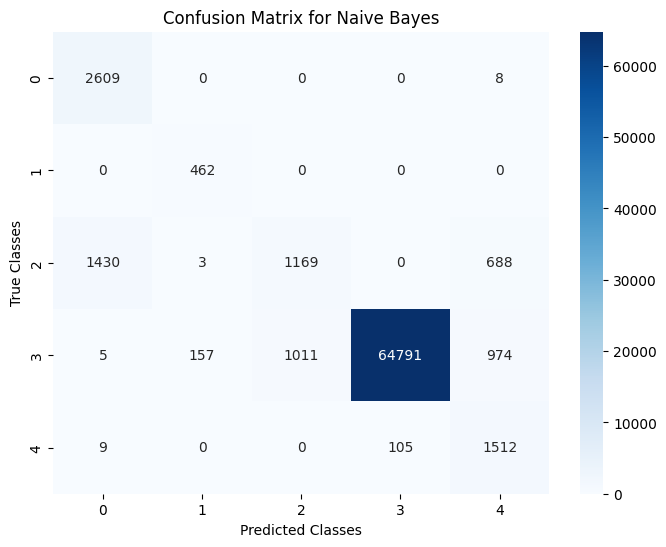

In [ ]:
# Build confusion matrix
conf_matrix_nb = confusion_matrix(target_test, target_pred_nb)

# Visualize confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

#Logistic Regression Classifier

In [ ]:
#Build the LR model and fit the data to it
logreg_classifier = LogisticRegression(max_iter=1000)
logreg_classifier.fit(data_train_resampled,target_train_resampled)
#Predict the values using the LR model
target_pred_logreg = logreg_classifier.predict(data_test)

In [ ]:
#calculating the testing accuracy for the LR model
accuracy_logreg = accuracy_score(target_test, target_pred_logreg)
print(f'Test Accuracy: {accuracy_logreg* 100:.2f}%')
print("Classification Report for Logistic Regression\n", classification_report(target_test,target_pred_logreg ))

Test Accuracy: 91.83%
Classification Report for Logistic Regression
               precision    recall  f1-score   support

           0       0.58      0.15      0.24      2617
           1       0.92      0.64      0.76       462
           2       0.36      0.56      0.43      3290
           3       1.00      0.97      0.98     66938
           4       0.38      0.92      0.54      1626

    accuracy                           0.92     74933
   macro avg       0.65      0.65      0.59     74933
weighted avg       0.94      0.92      0.92     74933



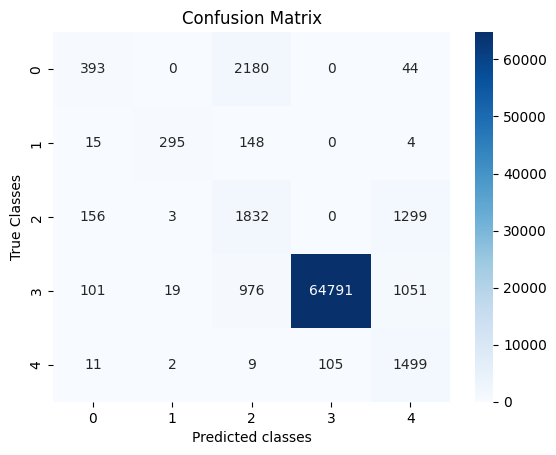

In [ ]:
# Plotting confusion matrix
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(target_test, target_pred_logreg), annot=True, cmap="Blues",fmt="d")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

#Ridge Classifier

In [ ]:
#Build the Ridge model and fit the data to it
ridge_classifier = RidgeClassifier()
ridge_classifier.fit(data_train_resampled, target_train_resampled)
#Predict the values using the Ridge model
target_pred_ridge = ridge_classifier.predict(data_test)


In [ ]:
#calculating the testing accuracy for the Ridge model
accuracy_ridge = accuracy_score(target_test, target_pred_ridge)
print(f'Test Accuracy: {accuracy_ridge* 100:.2f}%')
print("Classification Report for Ridge\n", classification_report(target_test,target_pred_ridge))

Test Accuracy: 91.41%
Classification Report for Ridge
               precision    recall  f1-score   support

           0       0.24      0.14      0.17      2617
           1       0.75      0.56      0.64       462
           2       0.39      0.48      0.43      3290
           3       1.00      0.97      0.98     66938
           4       0.36      0.93      0.52      1626

    accuracy                           0.91     74933
   macro avg       0.55      0.62      0.55     74933
weighted avg       0.93      0.91      0.92     74933



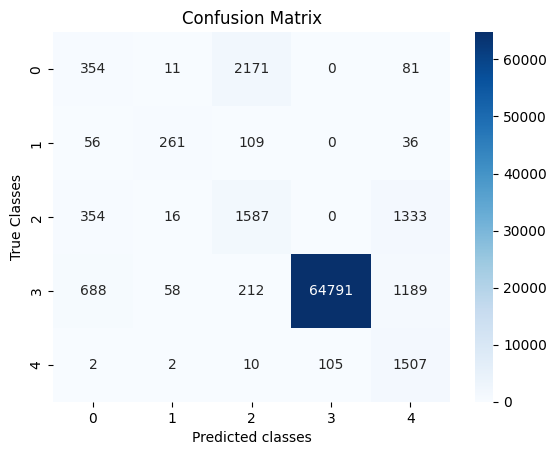

In [ ]:
# Plotting confusion matrix
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(target_test, target_pred_ridge), annot=True, cmap="Blues",fmt="d")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

#SGD Classifier

In [ ]:
#Build the SGD model and fit the data to it
sgd_classifier = SGDClassifier()
sgd_classifier.fit(data_train_resampled,target_train_resampled)
#Predict the values using the Ridge model
target_pred_sgd = sgd_classifier.predict(data_test)

In [ ]:
#calculating the testing accuracy for the SGD model
accuracy_sgd = accuracy_score(target_test, target_pred_sgd)
print(f'Test Accuracy: {accuracy_sgd* 100:.2f}%')
print("Classification Report for SGD\n", classification_report(target_test,target_pred_sgd))

Test Accuracy: 92.02%
Classification Report for SGD
               precision    recall  f1-score   support

           0       0.54      0.14      0.22      2617
           1       1.00      0.82      0.90       462
           2       0.36      0.55      0.44      3290
           3       1.00      0.97      0.98     66938
           4       0.39      0.93      0.55      1626

    accuracy                           0.92     74933
   macro avg       0.66      0.68      0.62     74933
weighted avg       0.94      0.92      0.92     74933



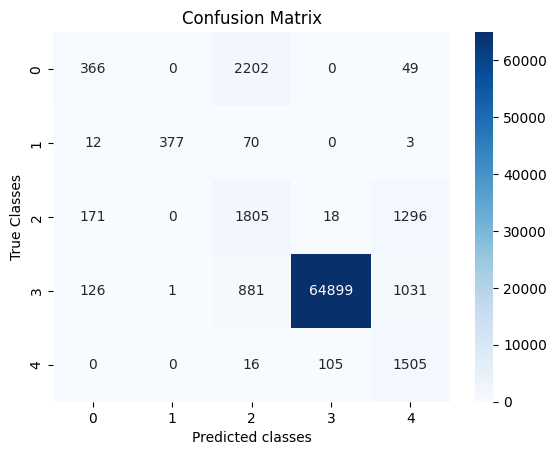

In [ ]:
# Plotting confusion matrix
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(target_test, target_pred_sgd), annot=True, cmap="Blues",fmt="d")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

#SVM

##Linear SVM

In [ ]:
from sklearn.svm import SVC
#calculating the testing accuracy for the SVM model
svm_classifierL = SVC(kernel='linear')
svm_classifierL.fit(data_train_resampled,target_train_resampled)
#Predict the values using the SVM model
target_pred_svm = svm_classifierL.predict(data_test)

In [ ]:
#calculating the testing accuracy for the SGD model
accuracy_svm = accuracy_score(target_test, target_pred_svm)
print(f'Test Accuracy: {accuracy_svm* 100:.2f}%')
print("Classification Report for linear SVM:\n", classification_report(target_test,target_pred_svm ))

Test Accuracy: 91.90%
Classification Report for linear SVM:
               precision    recall  f1-score   support

           0       0.62      0.15      0.24      2617
           1       0.98      0.67      0.79       462
           2       0.36      0.57      0.44      3290
           3       1.00      0.97      0.98     66938
           4       0.39      0.93      0.55      1626

    accuracy                           0.92     74933
   macro avg       0.67      0.66      0.60     74933
weighted avg       0.94      0.92      0.92     74933



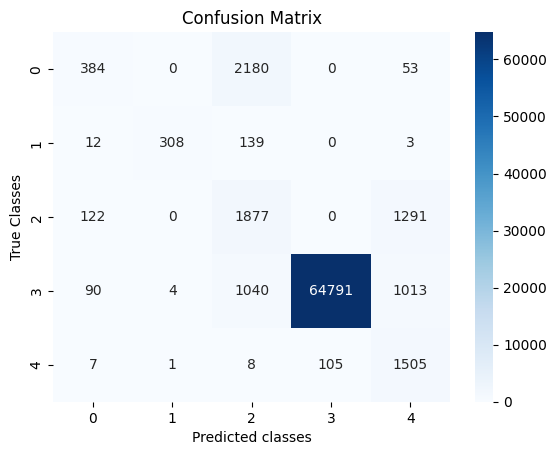

In [ ]:
# Plotting confusion matrix
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(target_test, target_pred_svm), annot=True, cmap="Blues",fmt="d")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

#Testing Accuracy visualization

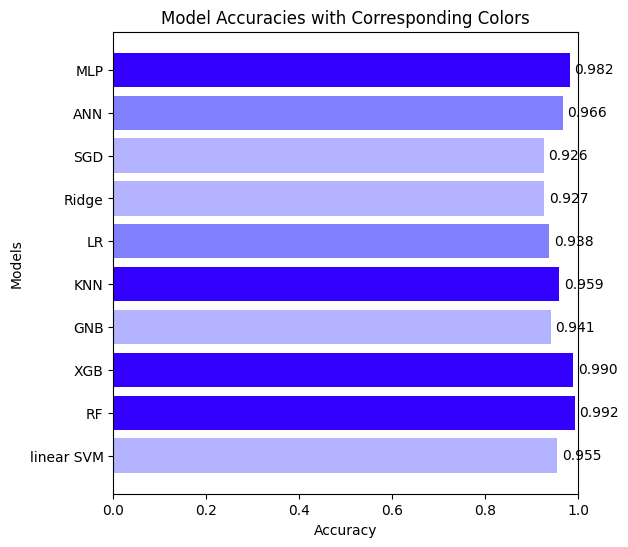

In [ ]:
model_names = ['linear SVM', 'RF', 'XGB', 'GNB', 'KNN', 'LR', 'Ridge', 'SGD', 'ANN', 'MLP']
accuracies = [91.90,98.78,98.63,94.14,97.20,91.83,91.41,92.02,94.17,98.26]


normalized_accuracies = np.array(accuracies) / max(accuracies)


model_colors = {
    'linear SVM': (0.7, 0.7, 1),
    'RF': (0.2, 0, 1),
    'XGB': (0.2, 0, 1),
    'GNB': (0.7, 0.7, 1),
    'KNN': (0.2, 0, 1),
    'LR':  (0.5, 0.5, 1),
    'Ridge': (0.7, 0.7, 1),
    'SGD': (0.7, 0.7, 1),
    'ANN': (0.5, 0.5, 1),
    'MLP': (0.2, 0, 1)
}



plt.figure(figsize=(6, 6))
bars = plt.barh(model_names, accuracies, color=[model_colors[model] for model in model_names])
plt.title('Model Accuracies with Corresponding Colors')
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.xlim(0, 1)

for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2, f'{accuracy:.3f}', ha='left', va='center')

plt.show()